# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

#HOMEWORK!!! FIND API that we want to work with.

In [2]:
%pip install yfinance
%pip install yfinancials

     ---------------------------------------- 59.7/59.7 kB 3.1 MB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 6.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement yfinancials (from versions: none)
ERROR: No matching distribution found for yfinancials


Imports and set magics:

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


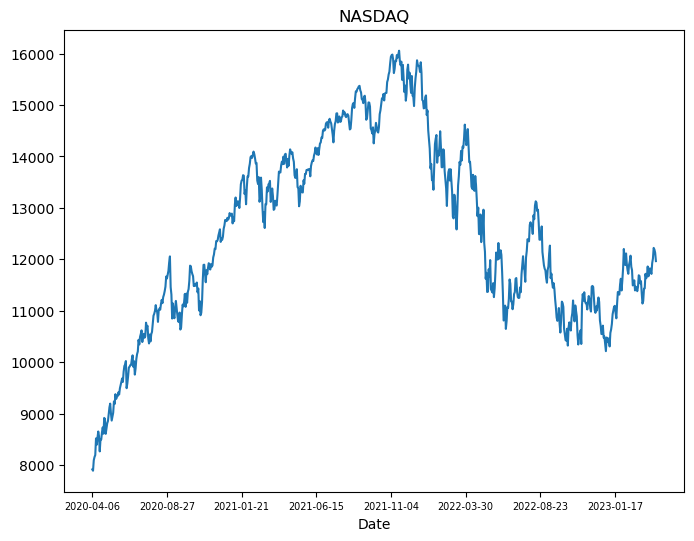

c:\Users\emil0\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


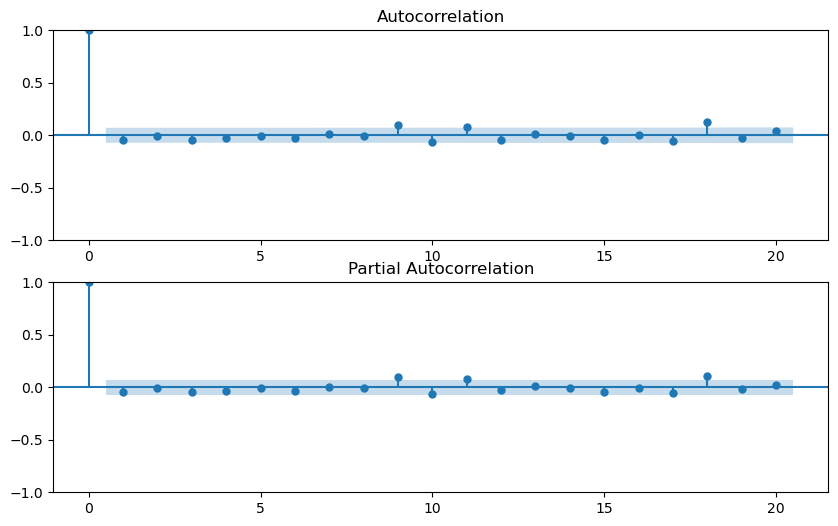

c:\Users\emil0\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\emil0\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\emil0\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          Close_logdiff   No. Observations:                  755
Model:                 ARIMA(1, 0, 1)   Log Likelihood                2059.502
Date:                Wed, 05 Apr 2023   AIC                          -4111.004
Time:                        16:56:15   BIC                          -4092.497
Sample:                             0   HQIC                         -4103.875
                                - 755                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.001      0.979      0.328      -0.001       0.002
ar.L1          0.2587      0.613      0.422      0.673      -0.942       1.460
ma.L1         -0.3036      0.605     -0.502      0.6

In [44]:
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# Getting all the packages
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create a Ticker object for the NASDAQ index
ticker = yf.Ticker('^IXIC')

# Download historical price data
nasdata = ticker.history(period='3y')[['Close']]

# Format the date column as yyyy-mm-dd
nasdata.index = nasdata.index.strftime('%Y-%m-%d')

# Take log differences of the Close variable
nasdata['Close_logdiff'] = np.log(nasdata['Close']).diff()

# Plot the original Close variable
nasdata['Close'].plot(figsize=(8, 6))
plt.title('NASDAQ')
plt.xticks(fontsize=7) # set the font size of the x-axis labels
plt.show()

# Plot the ACF and PACF of the log differences to determine the AR and MA parameters
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,6))
plot_acf(nasdata['Close_logdiff'].dropna(), lags=20, ax=ax[0])
plot_pacf(nasdata['Close_logdiff'].dropna(), lags=20, ax=ax[1])
plt.show()

#We see from the acf and pacf that the first lags are significant for both the ar and ma terms.
# Fit an ARIMA model to the log differences with the selected AR and MA parameters
model = ARIMA(nasdata['Close_logdiff'].dropna(), order=(1,0,1))
result = model.fit()

# Print the summary of the model results
print(result.summary())

 # Discussion

From figure x we see that the Nasdaq increased substanitally after 2020 probably caused by increases in the money supply. 


First we